In [1]:
%run ./../module_comparison.ipynb


# Set variable#

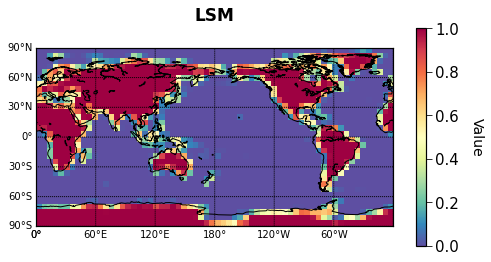

In [2]:
legend_array=["NSM2","WGAO2"]
name_files=["NSM2","WGAO2"]
path_array=["../../../NSM2_100_70_30_ML_SI_T21/output/analisi/",\
            "../../../WGAO2_100_70_30_ML_SI_T21/output/analisi/"]
starts=[70,70]
ends=[100,100]
step=[30,30]
time=[[i for i in range(1,j+1)]for j in ends]
resolution="T21"
if resolution=="T21":
    nlat=32
    nlon=64
    tot=2048
    mul=1
else:
    nlat=64
    nlon=128
    tot=8192
    mul=2
file_nc=Dataset(path_array[0]+name_files[0]+"_YM_30YM_100Y_tas.nc","r")
data172,_=read_graph_file("N0"+str(nlat)+"_surf_0172.sra","../../../NSM2_100_70_30_ML_SI_T21/",\
                          None,"LSM",12,4,"Value",0,1,plt.cm.Spectral_r)

In [3]:
z_press=[1000,850,700,500,400,300,250,200,150,100,70,50,30]

mesi=[["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"] for i in range(0,len(name_files))]
x=np.arange(-90,91,10)

#prendo le variabili lat e long da un qualsiasi file netcdf 

lats=[file_nc.variables["lat"][:] for i in range(0,len(name_files))]
lons=[file_nc.variables["lon"][:] for i in range(0,len(name_files))]
lat=file_nc.variables["lat"][:]
lats_inv=lat[::-1]
lats_inv=np.insert(lats_inv,0,-90)
lats_inv=np.append(lats_inv,90)
#print(lats_inv)
lat_m=np.zeros(len(lats_inv)-1)
delta_lat=np.zeros(len(lats_inv)-1)
r_eq=6371000
for i in range(1,len(lats_inv)):
    lat_m[i-1]=(lats_inv[i]-lats_inv[i-1])/2+lats_inv[i-1]
    delta_lat[i-1]=lats_inv[i]-lats_inv[i-1]

# AS #

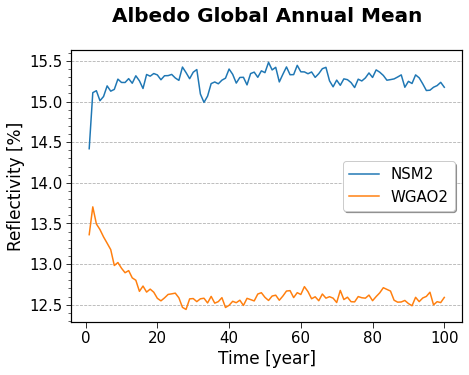

Mean 70-100: 15.255766610304514 dev.std: 0.06464206356542156
Mean 70-100: 12.581855480869612 dev.std: 0.05639299195485012


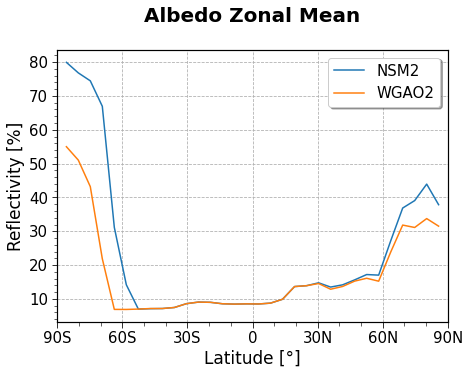

In [4]:
data_as_global,data_as_zonal,data_as_cycle_global,data_as_cycle_north,data_as_cycle_south=all_graph("as","Albedo","Reflectivity [%]",name_files,path_array,legend_array,starts,ends,step,lats,lons,mesi,100,False,position=(0.5,1.01))

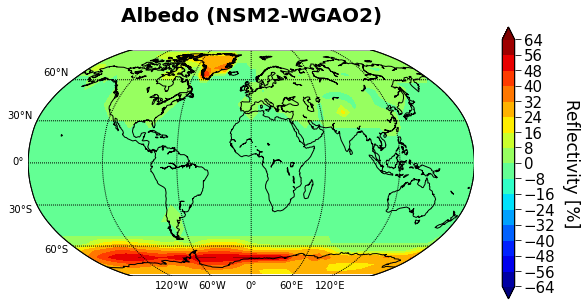

In [5]:
graph_globe_clt=all_graph_globe("as","Albedo","Reflectivity [%]",name_files,path_array,lons,lats,100,"robin",ends,step)

# CLH #

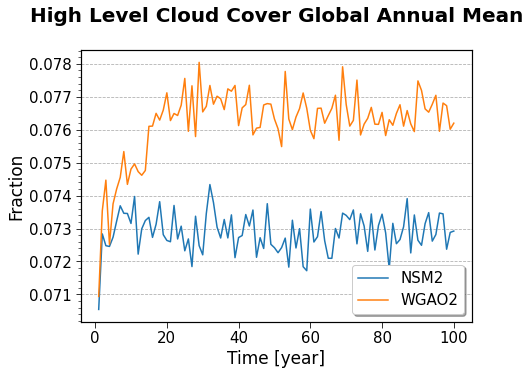

Mean 70-100: 0.0729491760333379 dev.std: 0.00048593513054462
Mean 70-100: 0.07644962047537168 dev.std: 0.00044115238801511694


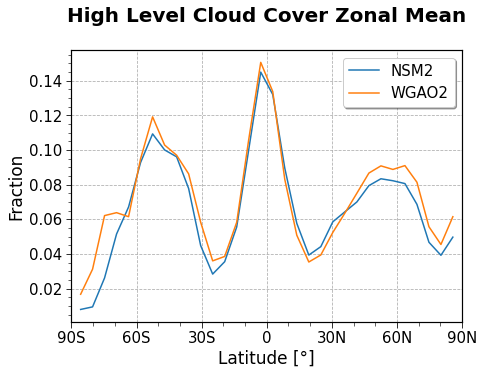

In [6]:
data_clh_global,data_clh_zonal,data_clh_cycle_global,data_clh_cycle_north,data_clh_cycle_south=all_graph("clh","High Level Cloud Cover","Fraction",name_files,path_array,legend_array,starts,ends,step,lats,lons,mesi,1,False)

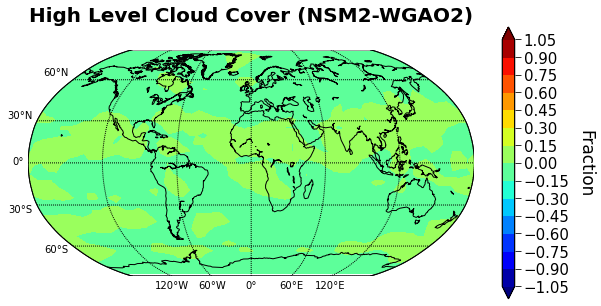

In [7]:
graph_globe_clh=all_graph_globe("clh","High Level Cloud Cover","Fraction",name_files,path_array,lons,lats,1,"robin",ends,step)

# CLL #

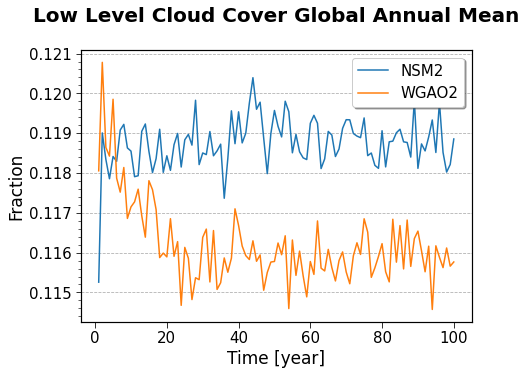

Mean 70-100: 0.11876626561085384 dev.std: 0.0004625773590709514
Mean 70-100: 0.11594608823458354 dev.std: 0.0005227776061369256


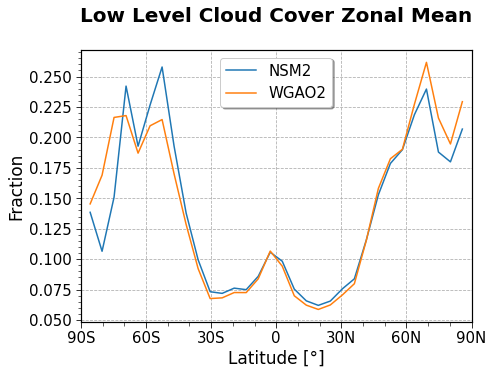

In [8]:
data_cll_global,data_cll_zonal,data_cll_cycle_global,data_cll_cycle_north,data_cll_cycle_south=all_graph("cll","Low Level Cloud Cover","Fraction",name_files,path_array,legend_array,starts,ends,step,lats,lons,mesi,1,False)

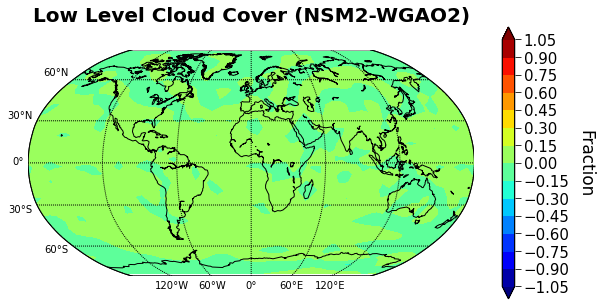

In [9]:
graph_globe_clt=all_graph_globe("cll","Low Level Cloud Cover","Fraction",name_files,path_array,lons,lats,1,"robin",ends,step)

# CLM #

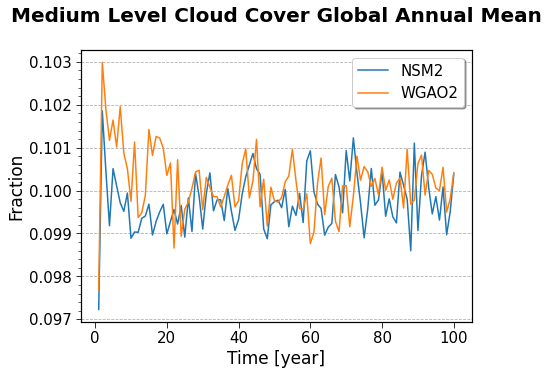

Mean 70-100: 0.099876752247413 dev.std: 0.000637765044383672
Mean 70-100: 0.10016607989867528 dev.std: 0.0004158377989662351


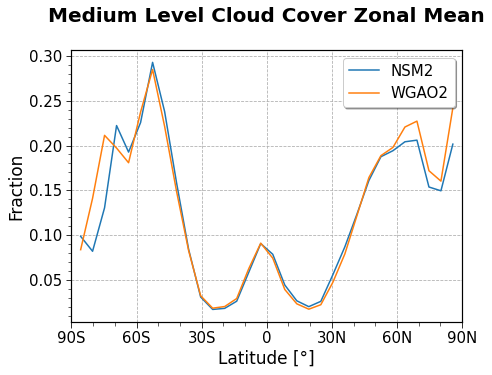

In [10]:
data_clm_global,data_clm_zonal,data_clm_cycle_global,data_clm_cycle_north,data_clm_cycle_south=all_graph("clm","Medium Level Cloud Cover","Fraction",name_files,path_array,legend_array,starts,ends,step,lats,lons,mesi,1,False)

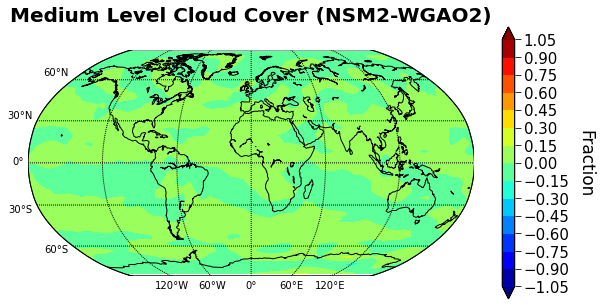

In [11]:
graph_globe_clm=all_graph_globe("clm","Medium Level Cloud Cover","Fraction",name_files,path_array,lons,lats,1,"robin",ends,step)

# CLT #

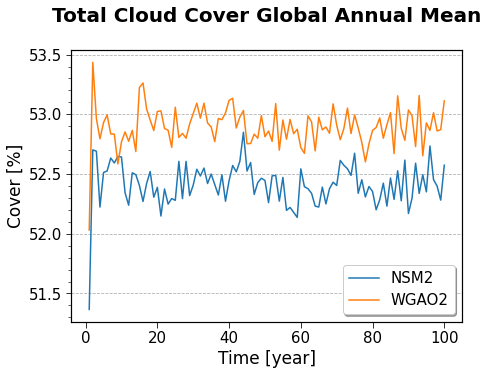

Mean 70-100: 52.42449720700582 dev.std: 0.14492315681722465
Mean 70-100: 52.89050539334615 dev.std: 0.13914047907582103


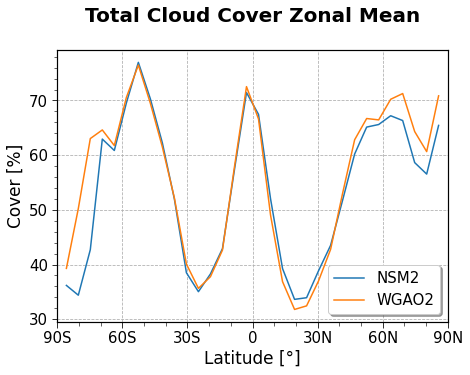

In [12]:
data_clt_global,data_clt_zonal,data_clt_cycle_global,data_clt_cycle_north,data_clt_cycle_south=all_graph("clt","Total Cloud Cover","Cover [%]",name_files,path_array,legend_array,starts,ends,step,lats,lons,mesi,100,False)

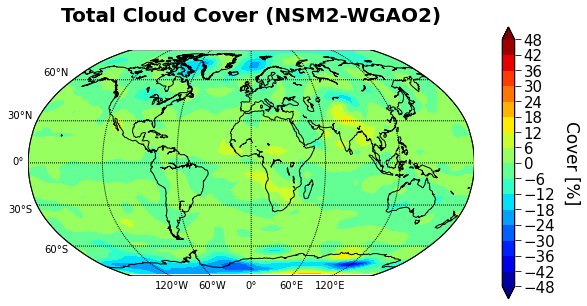

In [13]:
graph_globe_clt=all_graph_globe("clt","Total Cloud Cover","Cover [%]",name_files,path_array,lons,lats,100,"robin",ends,step)

# EVAP #

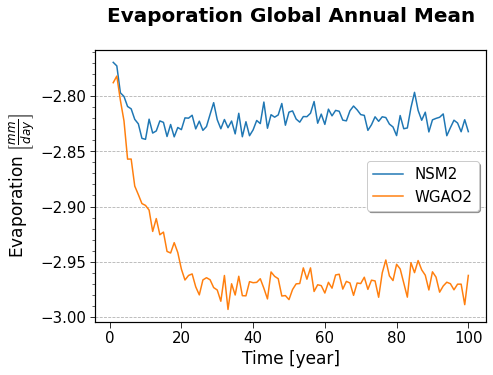

Mean 70-100: -2.822671867761528 dev.std: 0.00819536447704769
Mean 70-100: -2.9662876238489844 dev.std: 0.009827526001626228


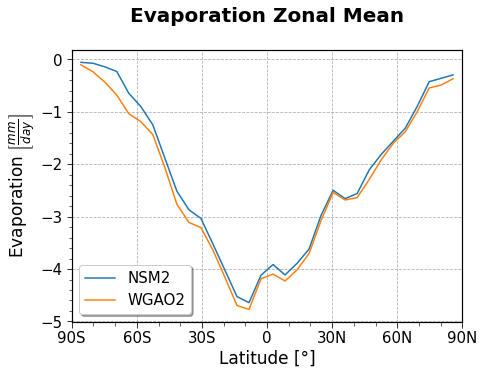

In [14]:
data_evap_global,data_evap_zonal,data_evap_cycle_global,data_evap_cycle_north,data_evap_cycle_south=all_graph("evap","Evaporation",r"Evaporation $\left[\frac{mm}{day}\right]$",name_files,path_array,legend_array,starts,ends,step,lats,lons,mesi,86400000,False)


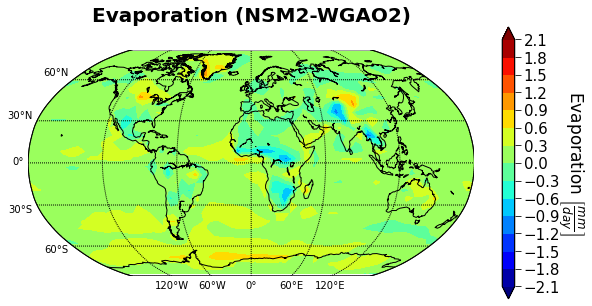

In [15]:
graph_globe_evap=all_graph_globe("evap","Evaporation",r"Evaporation $\left[\frac{mm}{day}\right]$",name_files,path_array,lons,lats,86400000,"robin",ends,step)

# HFLS #

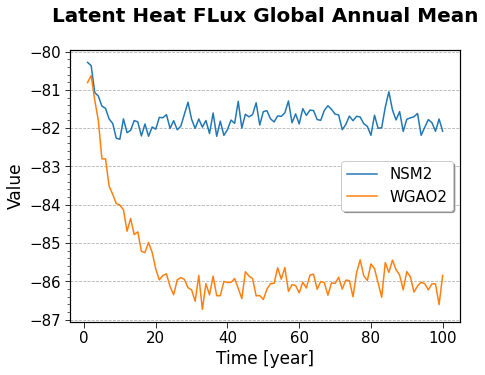

Mean 70-100: -81.80578994750977 dev.std: 0.23721492619551468
Mean 70-100: -85.95265986124674 dev.std: 0.28422319323558864


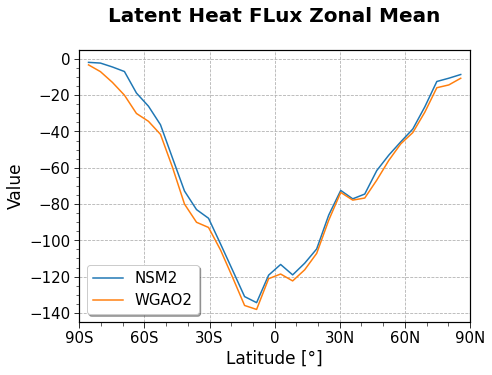

In [16]:
data_hfls_global,data_hfls_zonal,data_hfls_cycle_global,data_hfls_cycle_north,data_hfls_cycle_south=all_graph("hfls","Latent Heat FLux","Value",name_files,path_array,legend_array,starts,ends,step,lats,lons,mesi,1,False)

# HFSS #

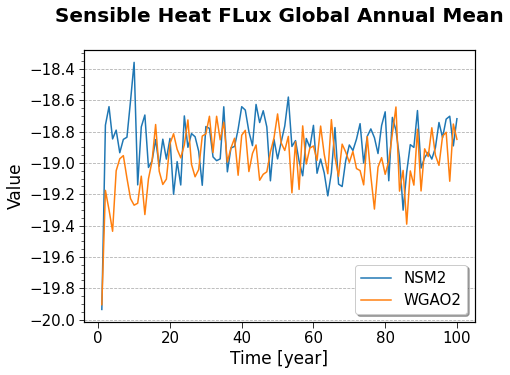

Mean 70-100: -18.871962292989096 dev.std: 0.14246875105044318
Mean 70-100: -18.98699951171875 dev.std: 0.16646445833589452


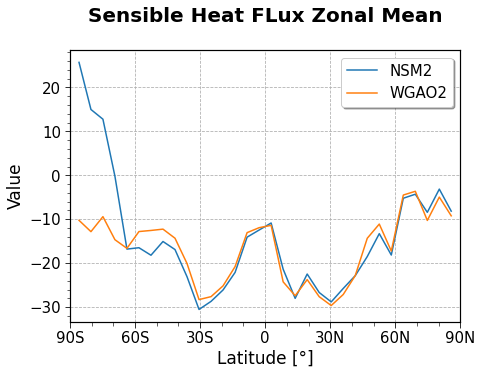

In [17]:
data_hfss_global,data_hfss_zonal,data_hfss_cycle_global,data_hfss_cycle_north,data_hfss_cycle_south=all_graph("hfss","Sensible Heat FLux","Value",name_files,path_array,legend_array,starts,ends,step,lats,lons,mesi,1,False)

# ICEC #

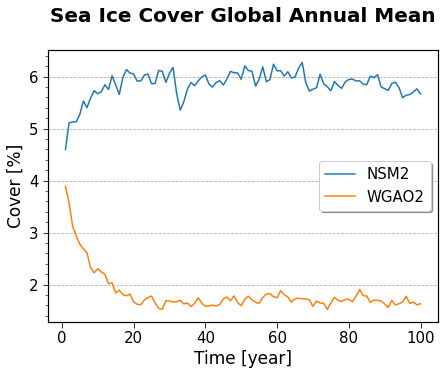

Mean 70-100: 5.8323439334829645 dev.std: 0.11603532306417819
Mean 70-100: 1.6834217589348555 dev.std: 0.07389036835235302


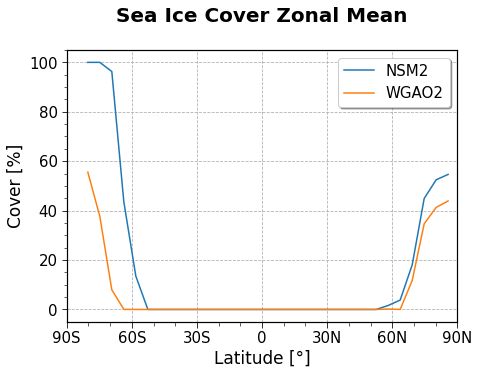

In [18]:
data_icec_global,data_icec_zonal,data_icec_cycle_global,data_icec_cycle_north,data_icec_cycle_south=all_graph("icec","Sea Ice Cover","Cover [%]",name_files,path_array,legend_array,starts,ends,step,lats,lons,mesi,100,False)

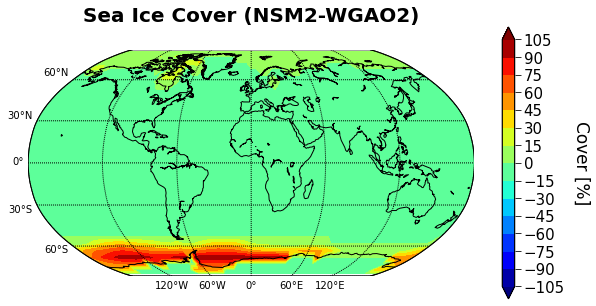

In [19]:
graph_globe_icec=all_graph_globe("icec","Sea Ice Cover","Cover [%]",name_files,path_array,lons,lats,100,"robin",ends,step)


# MRRO #

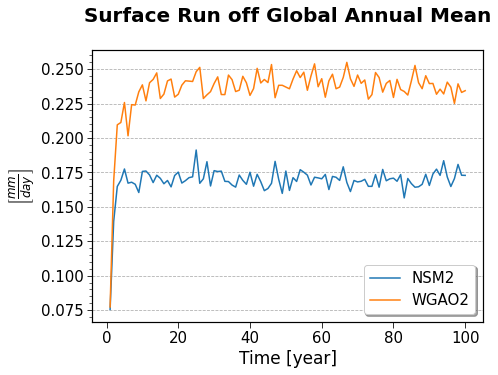

Mean 70-100: 0.1701294091205341 dev.std: 0.005448204417952586
Mean 70-100: 0.23738155377373005 dev.std: 0.005969039344057975


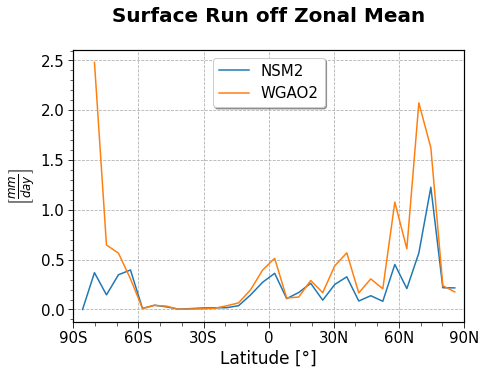

In [20]:
data_mrro_global,data_mrro_zonal,data_mrro_cycle_global,data_mrro_cycle_north,data_mrro_cycle_south=all_graph("mrro","Surface Run off",r"$\left[\frac{mm}{day}\right]$",name_files,path_array,legend_array,starts,ends,step,lats,lons,mesi,86400000,False)

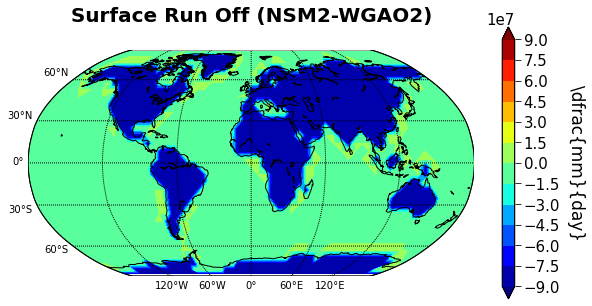

In [21]:
graph_globe_mrro=all_graph_globe("mrro","Surface Run Off",r"\dfrac{mm}{day}",name_files,path_array,lons,lats,86400000,"robin",ends,step)

# MRSO #

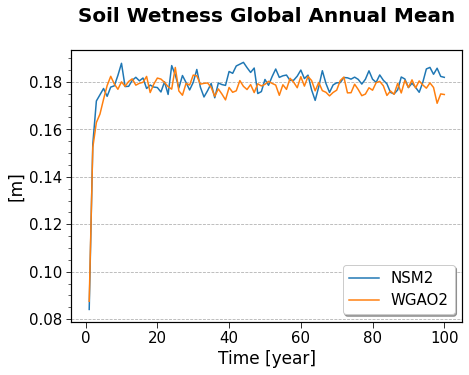

Mean 70-100: 0.18070202817519507 dev.std: 0.0028602333397302012
Mean 70-100: 0.17737357219060262 dev.std: 0.00253623542787951


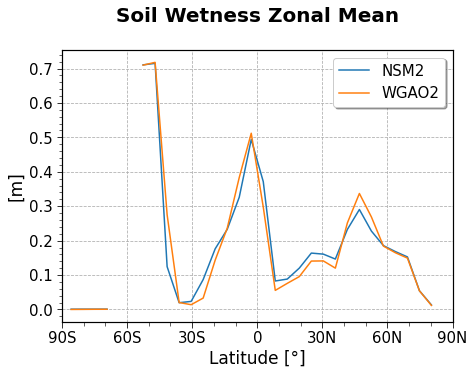

In [22]:
data_mrso_global,data_mrso_zonal,data_mrso_cycle_global,data_mrso_cycle_north,data_mrso_cycle_south=all_graph("mrso","Soil Wetness","[m]",name_files,path_array,legend_array,starts,ends,step,lats,lons,mesi,1,False)

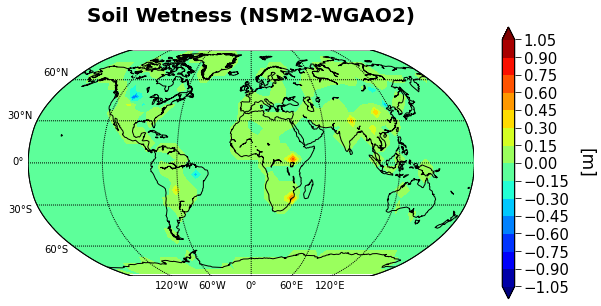

In [23]:
graph_globe_mrso=all_graph_globe("mrso","Soil Wetness","[m]",name_files,path_array,lons,lats,1,"robin",ends,step)

# PRT #

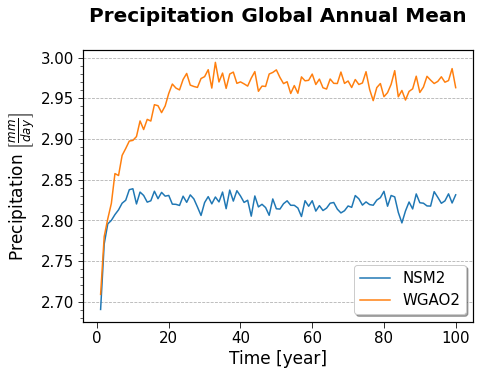

Mean 70-100: 2.822511101641112 dev.std: 0.008260782156312582
Mean 70-100: 2.9662585399137242 dev.std: 0.009951052863350645


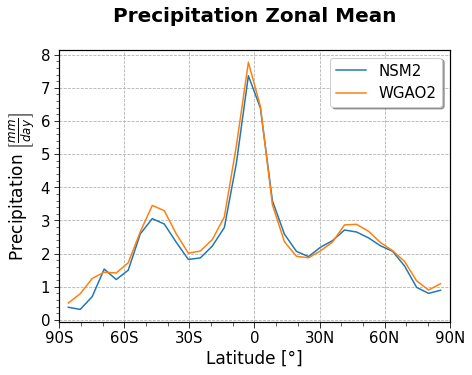

In [24]:
data_prt_global,data_prt_zonal,data_prt_cycle_global,data_prt_cycle_north,data_prt_cycle_south=all_graph_sum("prl","prc","Precipitation",r"Precipitation $\left[\frac{mm}{day}\right]$",name_files,path_array,legend_array,starts,ends,step,lats,lons,mesi,86400000,False)

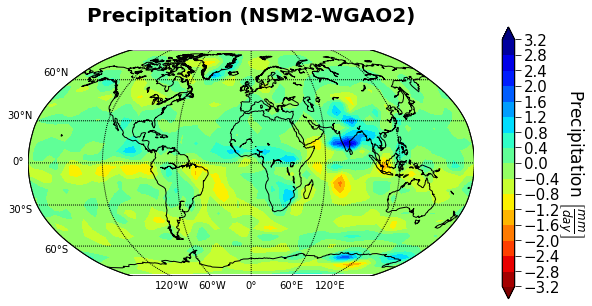

In [25]:
#Difference
graph_globe_prt=[np.add(86400000*Dataset(path_array[i]+name_files[i]+"_YM_"+str(step[i])+"YM_"+str(ends[i])+"Y_prl.nc").variables["prl"][0],86400000*Dataset(path_array[i]+name_files[i]+"_YM_"+str(step[i])+"YM_"+str(ends[i])+"Y_prc.nc").variables["prc"][0]) for i in range(0,len(name_files))]
all_graph_globe2(graph_globe_prt,"Precipitation",r"Precipitation $\left[\frac{mm}{day}\right]$",lons,lats,"robin")

# P-E #

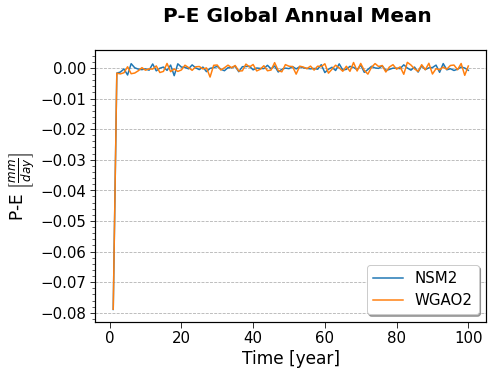

Mean 70-100: -0.0001607661204161559 dev.std: 0.0006958818338047055
Mean 70-100: -2.908393526013242e-05 dev.std: 0.0011460320718491462


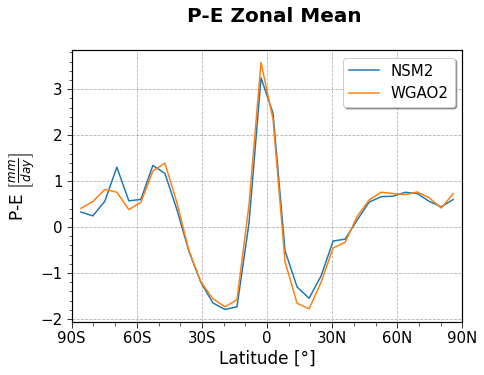

In [26]:
 #Global Annual Cycle
data_p_e_global=[data_prt_global[i]+data_evap_global[i]for i in range(0,len(name_files))]

graph(time,data_p_e_global,"  P-E Global Annual Mean",legend_array,"upper center","Time [year]",r"P-E $\left[\frac{mm}{day}\right]$",True,False)
print_value(data_p_e_global,starts,ends)               
#Zonal
data_p_e_zonal=[data_prt_zonal[i]+data_evap_zonal[i]for i in range(0,len(name_files))]
graph(lats,data_p_e_zonal,"  P-E Zonal Mean",legend_array,"upper center","Latitude [°]",r"P-E $\left[\frac{mm}{day}\right]$",True,True)
#1 year cycle
#Global
#data_p_e_cycle_global=[data_prt_cycle_global[i]+data_evap_cycle_global[i] for i in range(0,len(name_files))]
#graph(mesi,data_p_e_cycle_global,"  P-E Global Annual Cycle",legend_array,"upper center","Time [month]",r"P-E $\left[\frac{mm}{day}\right]$",True,False)
#North
#data_p_e_cycle_north=[data_prt_cycle_north[i]+data_evap_cycle_north[i] for i in range(0,len(name_files))]
#graph(mesi,data_p_e_cycle_north,"  P-E North Annual Cycle",legend_array,"upper center","Time [month]",r"P-E $\left[\frac{mm}{day}\right]$",True,False)
#South
#data_p_e_cycle_south=[data_prt_cycle_south[i]+data_evap_cycle_south[i]for i in range(0,len(name_files))]
#graph(mesi,data_p_e_cycle_south,"  P-E South Annual Cycle",legend_array,"upper center","Time [month]",r"P-E $\left[\frac{mm}{day}\right]$",True,False)
#Difference
#graph_globe_p_e=[graph_globe_prt[i]+graph_globe_evap[i] for i in range(0,len(name_files))]
#all_graph_globe2(graph_globe_p_e,"P-E",r"P-E $\left[\frac{mm}{day}\right]$",lons,lats,"robin")

## Humidity Mass Meridional Transport ##

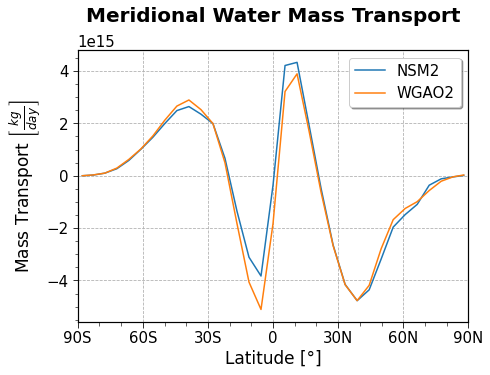

In [27]:
p_e_mer_transport=np.zeros((len(data_p_e_zonal),len(delta_lat)))
for j in range(0,len(data_p_e_zonal)):
    data_p_e_mean=np.mean(data_p_e_global[j][starts[j]:ends[j]])
   
    #p_e_mer_transport[j]=np.insert(p_e_mer_transport[j],0,0)
    for i in range(1,len(p_e_mer_transport[j])):
        p_e_mer_transport[j][i]=p_e_mer_transport[j][i-1]+2*r_eq**2*np.pi*np.cos(np.pi*lat_m[i-1]/180)*delta_lat[i-1]*(data_p_e_zonal[j][i-1]-data_p_e_mean)*997/1000
    
graph([lat_m for i in range(0,len(name_files))],p_e_mer_transport,"Meridional Water Mass Transport",legend_array,"upper center","Latitude [°]",r"Mass Transport $\left[\frac{kg}{day}\right]$",True,True)

# P+E-R #

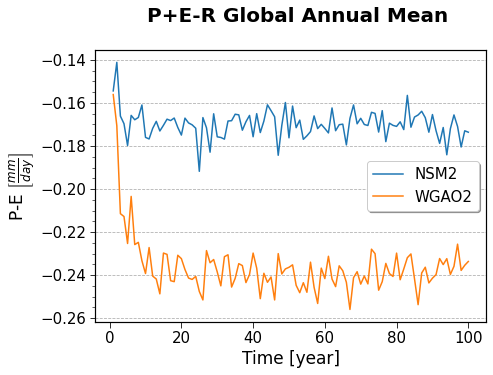

Mean 70-100: -0.17029017524095025 dev.std: 0.005540976426028111
Mean 70-100: -0.23741063770899018 dev.std: 0.005996306609774819


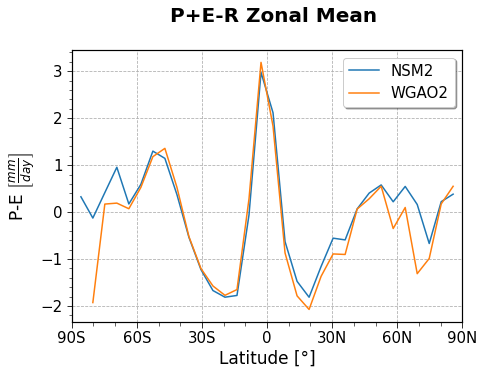

In [28]:

#Global Annual Cycle
data_p_e_global=[data_prt_global[i]+data_evap_global[i]-data_mrro_global[i] for i in range(0,len(name_files))]
graph(time,data_p_e_global,"  P+E-R Global Annual Mean",legend_array,"upper left","Time [year]",r"P-E $\left[\frac{mm}{day}\right]$",True,False)
print_value(data_p_e_global,starts,ends)               
#Zonal
data_p_e_zonal=[data_prt_zonal[i]+data_evap_zonal[i]-data_mrro_zonal[i] for i in range(0,len(name_files))]
graph(lats,data_p_e_zonal,"  P+E-R Zonal Mean",legend_array,"upper left","Latitude [°]",r"P-E $\left[\frac{mm}{day}\right]$",True,True)
#1 year cycle
#Global
#data_p_e_cycle_global=[data_prt_cycle_global[i]+data_evap_cycle_global[i]-data_mrro_cycle_global[i] for i in range(0,len(name_files))]
#graph(mesi,data_p_e_cycle_global,"  P+E-R Global Annual Cycle",legend_array,"upper center","Time [month]",r"P-E $\left[\frac{mm}{day}\right]$",True,False)
#North
#data_p_e_cycle_north=[data_prt_cycle_north[i]+data_evap_cycle_north[i]-data_mrro_cycle_north[i]for i in range(0,len(name_files))]
#graph(mesi,data_p_e_cycle_north,"  P+E-R North Annual Cycle",legend_array,"upper center","Time [month]",r"P-E $\left[\frac{mm}{day}\right]$",True,False)
#South
#data_p_e_cycle_south=[data_prt_cycle_south[i]+data_evap_cycle_south[i]-data_mrro_cycle_south[i] for i in range(0,len(name_files))]
#graph(mesi,data_p_e_cycle_south,"  P+E-R South Annual Cycle",legend_array,"upper center","Time [month]",r"P-E $\left[\frac{mm}{day}\right]$",True,False)
#Difference
#graph_globe_p_e=[graph_globe_prt[i]+graph_globe_evap[i]-graph_globe_mrro[i] for i in range(0,len(name_files))]
#all_graph_globe2(graph_globe_p_e,"P+E-R",r"P+E-R $\left[\frac{mm}{day}\right]$",lons,lats,"robin")

# PRSN #

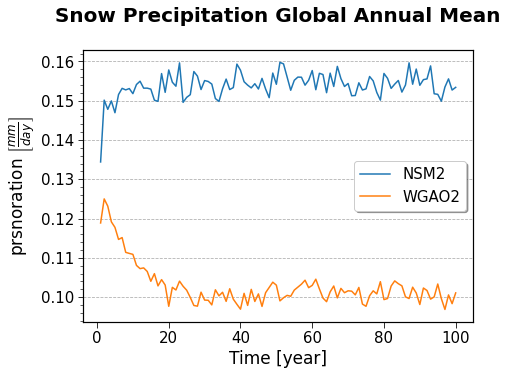

Mean 70-100: 0.15404567605514785 dev.std: 0.002360721302445895
Mean 70-100: 0.1007959133758618 dev.std: 0.0018902602461584991


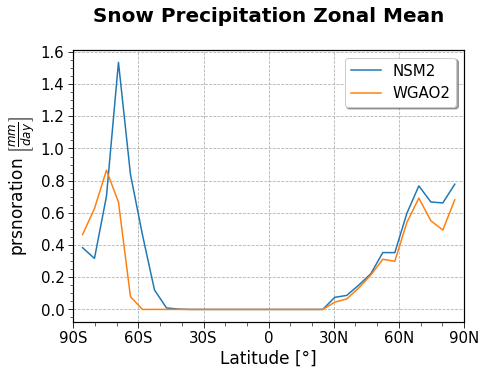

In [29]:
data_prsn_global,data_prsn_zonal,data_prsn_cycle_global,data_prsn_cycle_north,data_prsn_cycle_south=all_graph("prsn","Snow Precipitation",r"prsnoration $\left[\frac{mm}{day}\right]$",name_files,path_array,legend_array,starts,ends,step,lats,lons,mesi,86400000,False)

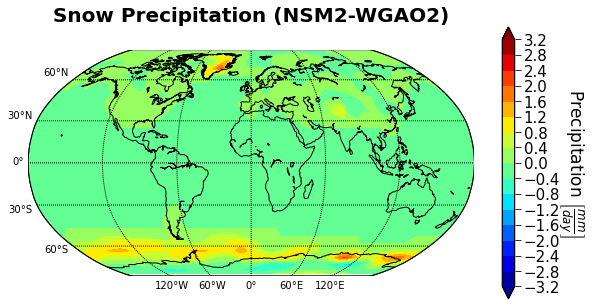

In [30]:
graph_globe_prsn=all_graph_globe("prsn","Snow Precipitation",r"Precipitation $\left[\frac{mm}{day}\right]$",name_files,path_array,lons,lats,86400000,"robin",ends,step)

# SIT #

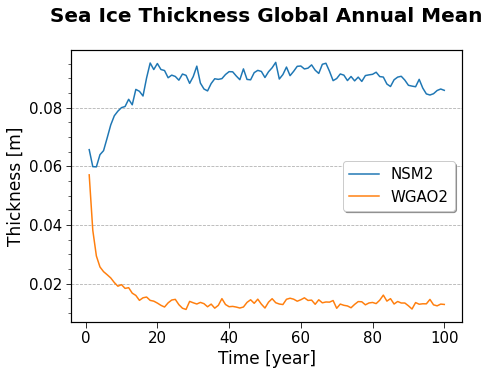

Mean 70-100: 0.0887338104347388 dev.std: 0.002237494989878968
Mean 70-100: 0.01329793551315864 dev.std: 0.0009120569975557992


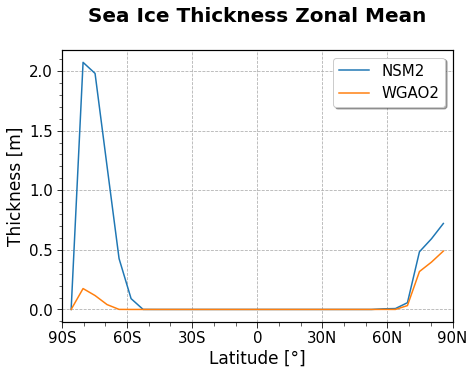

In [31]:
data_sit_global,data_sit_zonal,data_sit_cycle_global,data_sit_cycle_north,data_sit_cycle_south=all_graph("sit","Sea Ice Thickness","Thickness [m]",name_files,path_array,legend_array,starts,ends,step,lats,lons,mesi,1,False)

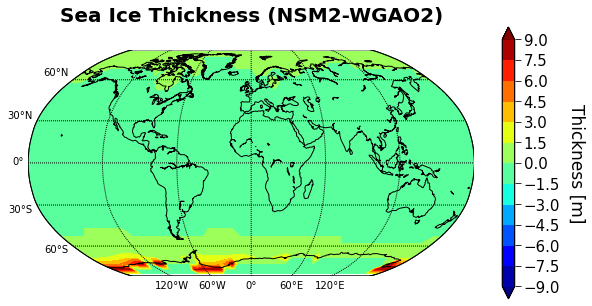

In [32]:
graph_globe_sit=all_graph_globe("sit","Sea Ice Thickness","Thickness [m]",name_files,path_array,lons,lats,1,"robin",ends,step)


# SND #

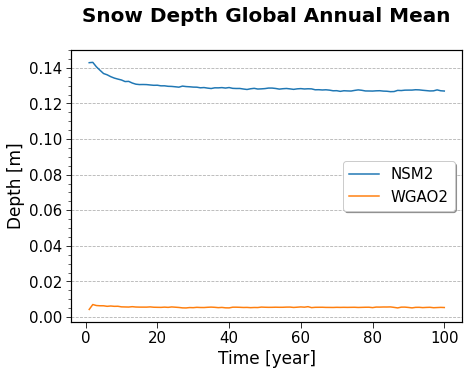

Mean 70-100: 0.1271882727742195 dev.std: 0.00028336817099472347
Mean 70-100: 0.005466945143416524 dev.std: 0.00013203080384135323


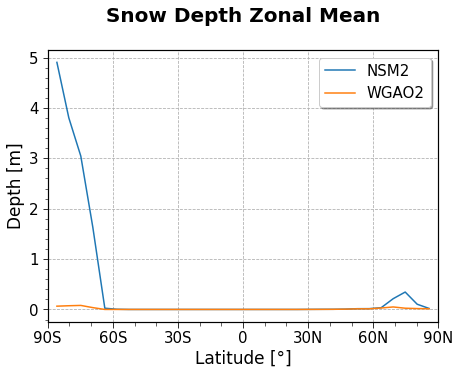

In [33]:
data_snd_global,data_snd_zonal,data_snd_cycle_global,data_snd_cycle_north,data_snd_cycle_south=all_graph("snd","Snow Depth","Depth [m]",name_files,path_array,legend_array,starts,ends,step,lats,lons,mesi,1,False)

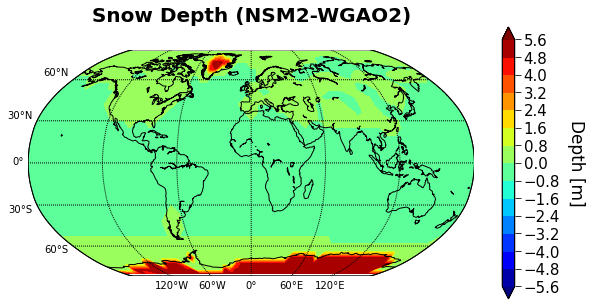

In [34]:
graph_globe_snd=all_graph_globe("snd","Snow Depth","Depth [m]",name_files,path_array,lons,lats,1,"robin",ends,step)


# SST #

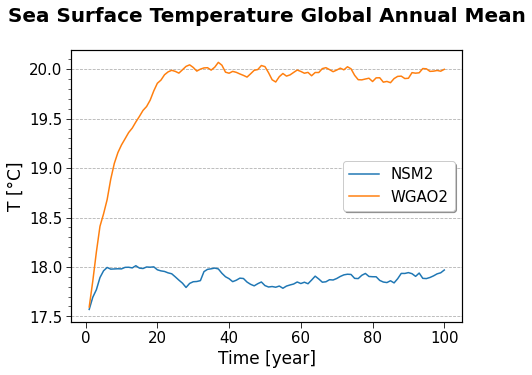

Mean 70-100: 17.90407314300537 dev.std: 0.032161773254121145
Mean 70-100: 19.94289099375407 dev.std: 0.04850664662327599


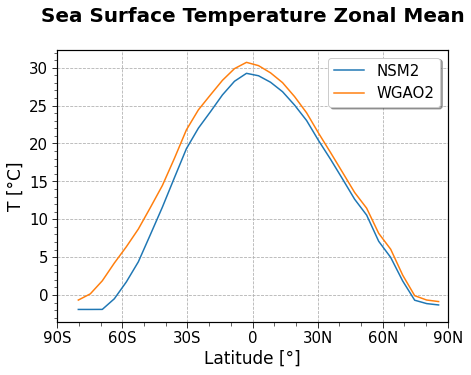

In [35]:
data_sst_global,data_sst_zonal,data_sst_cycle_global,data_sst_cycle_north,data_sst_cycle_south=all_graph("sst","Sea Surface Temperature","T [°C]",name_files,path_array,legend_array,starts,ends,step,lats,lons,mesi,1,True)

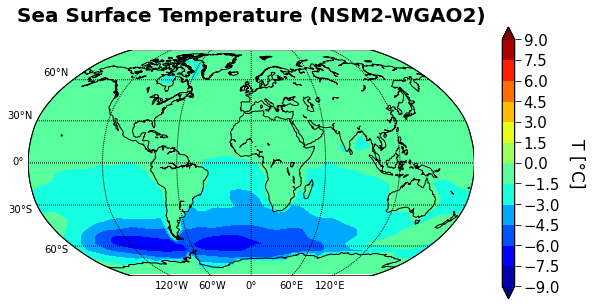

In [36]:
graph_globe_sst=all_graph_globe("sst","Sea Surface Temperature","T [°C]",name_files,path_array,lons,lats,1,"robin",ends,step)


# TAS #

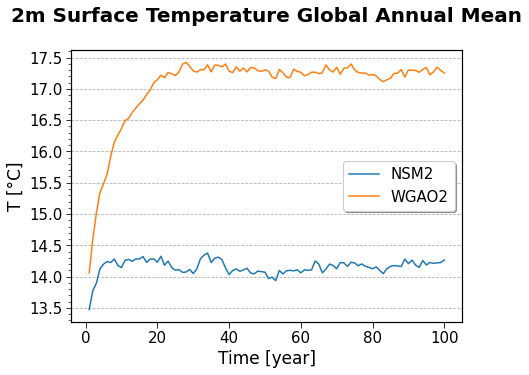

Mean 70-100: 14.188354969024658 dev.std: 0.050873283515342704
Mean 70-100: 17.259480730692545 dev.std: 0.06426560860878304


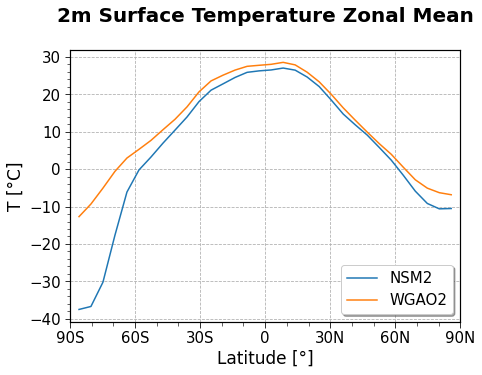

In [37]:
data_tas_global,data_tas_zonal,data_tas_cycle_global,data_tas_cycle_north,data_tas_cycle_south\
=all_graph("tas","2m Surface Temperature","T [°C]",name_files,path_array,legend_array,starts,\
           ends,step,lats,lons,mesi,1,True)

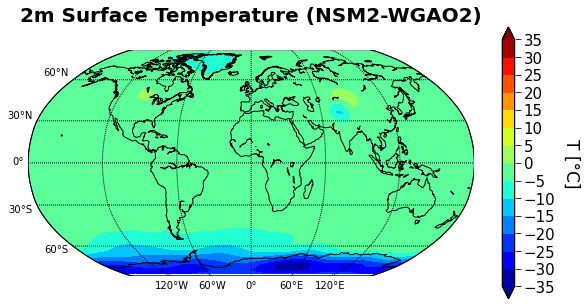

In [38]:
graph_globe_tas=all_graph_globe("tas","2m Surface Temperature","T [°C]",name_files,path_array,lons,lats,1,"robin",ends,step)


# TSO #

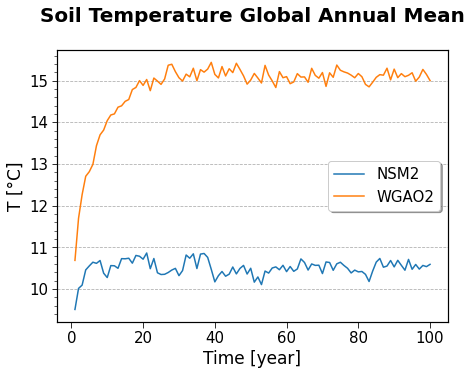

Mean 70-100: 10.534954579671224 dev.std: 0.11932658089287845
Mean 70-100: 15.11253760655721 dev.std: 0.1220876449172881


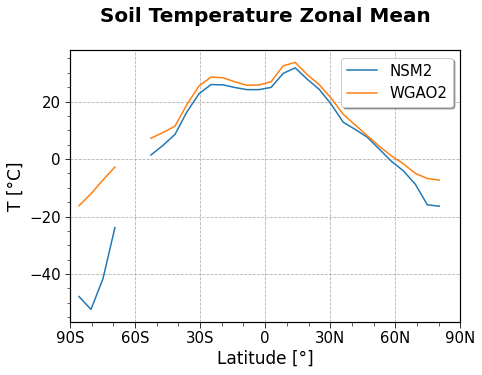

In [39]:
data_tso_global,data_tso_zonal,data_tso_cycle_global,data_tso_cycle_north,data_tso_cycle_south=all_graph("tso","Soil Temperature","T [°C]",name_files,path_array,legend_array,starts,ends,step,lats,lons,mesi,1,True)

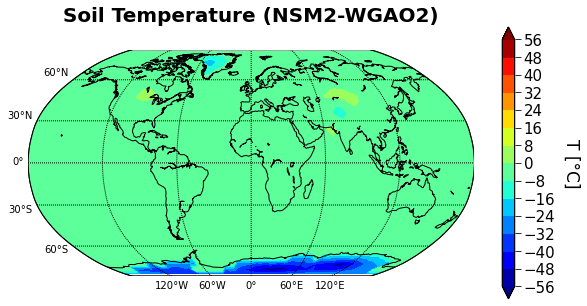

In [40]:
graph_globe_tso=all_graph_globe("tso","Soil Temperature","T [°C]",name_files,path_array,lons,lats,1,"robin",ends,step)


# Zonal Wind #

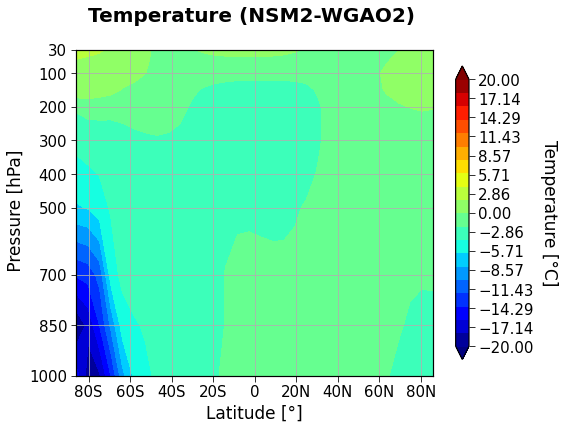

In [41]:
graph_level("ta","Temperature","Temperature [°C]",name_files,path_array,ends,step,z_press,lat,1,-20,20)

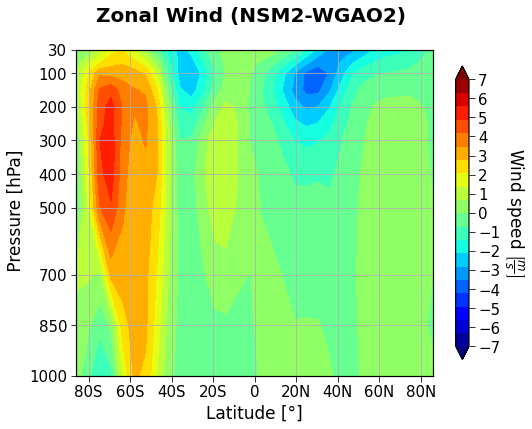

In [42]:
graph_level("u","Zonal Wind",r"Wind speed $\left[\frac{m}{s}\right]$",name_files,path_array,ends,step,z_press,lat,1,-7,7)

# Radiation balance at TOA #

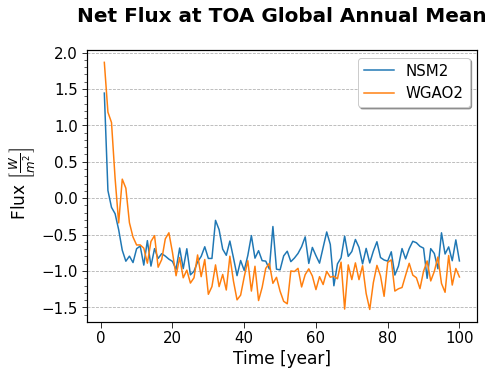

Mean 70-100: -0.7602269490559895 dev.std: 0.14625741190550792
Mean 70-100: -1.0803426106770833 dev.std: 0.17892366944375135


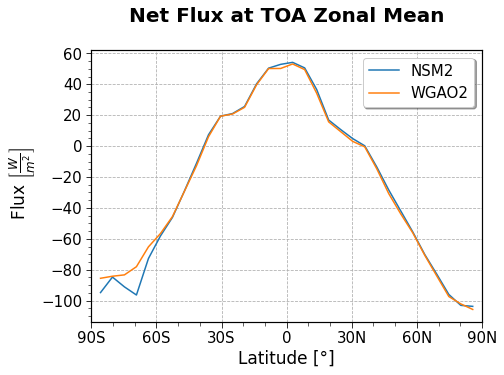

In [43]:
data_TOA_global,data_TOA_zonal,data_TOA_cycle_global,data_TOA_cycle_north,data_TOA_cycle_south=all_graph_sum("rlut","rst","Net Flux at TOA",r" Flux $\left[\frac{W}{m ^2}\right]$",name_files,path_array,legend_array,starts,ends,step,lats,lons,mesi,1,False)

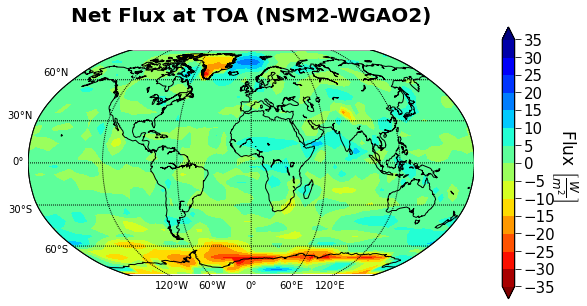

In [44]:
#Difference
graph_globe_TOA=[np.add(Dataset(path_array[i]+name_files[i]+"_YM_"+str(step[i])+"YM_"+str(ends[i])+"Y_rlut.nc").variables["rlut"][0],Dataset(path_array[i]+name_files[i]+"_YM_"+str(step[i])+"YM_"+str(ends[i])+"Y_rst.nc").variables["rst"][0]) for i in range(0,len(name_files))]
all_graph_globe2(graph_globe_TOA,"Net Flux at TOA",r" Flux $\left[\frac{W}{m ^2}\right]$",lons,lats,"robin")

## Meridional Transport TOA##

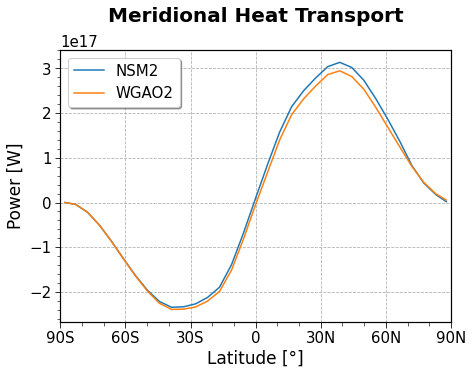

In [45]:
toa_mer_transport=np.zeros((len(data_TOA_zonal),len(delta_lat)))
for j in range(0,len(data_TOA_zonal)):
    data_TOA_mean=np.mean(data_TOA_global[j][starts[j]:ends[j]])
   
    #toa_mer_transport[j]=np.insert(toa_mer_transport[j],0,0)
    for i in range(1,len(toa_mer_transport[j])):
        toa_mer_transport[j][i]=toa_mer_transport[j][i-1]+2*r_eq**2*np.pi*np.cos(np.pi*lat_m[i-1]/180)*delta_lat[i-1]*(data_TOA_zonal[j][i-1]-data_TOA_mean)
    
graph([lat_m for i in range(0,len(name_files))],toa_mer_transport,"Meridional Heat Transport",legend_array,"upper center","Latitude [°]","Power [W]",True,True)

# Radiation balance at Surface ##

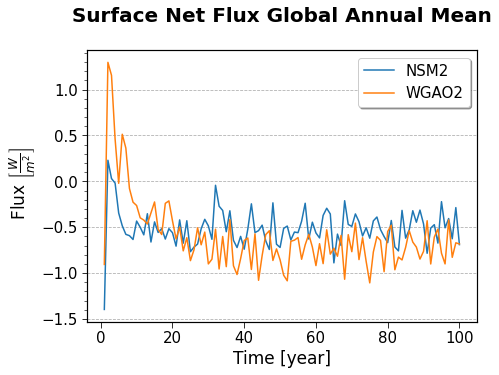

Mean 70-100: -0.507428886319506 dev.std: 0.1457744208638095
Mean 70-100: -0.719130467836267 dev.std: 0.17405294604382612


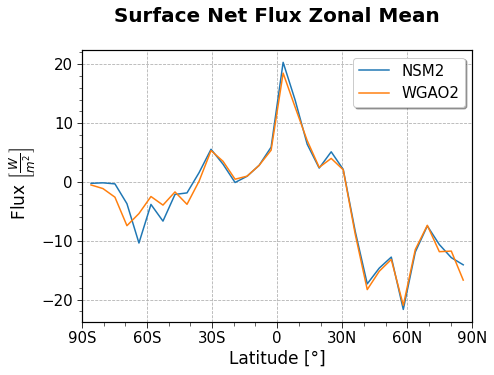

In [46]:
#Global Annual Cycle
data_SUP_global=[Net_Flux_Sup(name_files[i],"_YM_FM_"+str(ends[i])+"Y_",path_array[i]\
                              ,ends[i],1,None,None,None,None) for i in range(0,len(name_files))]
graph(time,data_SUP_global,"Surface Net Flux Global Annual Mean",legend_array,\
      "upper center","Time [year]",r" Flux $\left[\frac{W}{m ^2}\right]$",True,False)
print_value(data_SUP_global,starts,ends)
#Zonal
data_SUP_zonal=[Net_Flux_Sup(name_files[i],"_YM_"+str(step[i])+"YM_ZM_"+str(ends[i])+"Y_",\
                             path_array[i],nlat,1,None,None,None,None) for i in range(0,len(name_files))]
graph(lats,data_SUP_zonal,"Surface Net Flux Zonal Mean",legend_array,"upper center",\
      "Latitude [°]",r" Flux $\left[\frac{W}{m ^2}\right]$",True,True)

#1 year cycle
#Global
#data_SUP_global_cycle=[Net_Flux_Sup(name_files[i],"_FM_"+str(ends[i])+"Y_",\
 #               path_array[i],12,2,"global",False,step[i],starts[i]) for i in range(0,len(name_files))]
#graph(mesi,data_SUP_global_cycle,"Surface Net Flux Global Annual Cycle",\
   #   legend_array,"upper center","Time [month]",r" Flux $\left[\frac{W}{m ^2}\right]$",True,False)

#North

#data_SUP_north_cycle=[Net_Flux_Sup(name_files[i],"_all_",path_array[i],12,2,\
#                                   "north",False,step[i],starts[i]) for i in range(0,len(name_files))]
#graph(mesi,data_SUP_north_cycle,"Surface Net Flux North Annual Cycle",\
#      legend_array,"upper center","Time [month]",r" Flux $\left[\frac{W}{m ^2}\right]$",True,False)

#South
#data_SUP_south_cycle=[Net_Flux_Sup(name_files[i],"_all_",path_array[i],\
#                                   12,2,"south",False,step[i],starts[i]) for i in range(0,len(name_files))]
#graph(mesi,data_SUP_south_cycle,"Surface Net Flux South Annual Cycle",\
#      legend_array,"upper center","Time [month]",r" Flux $\left[\frac{W}{m ^2}\right]$",True,False)


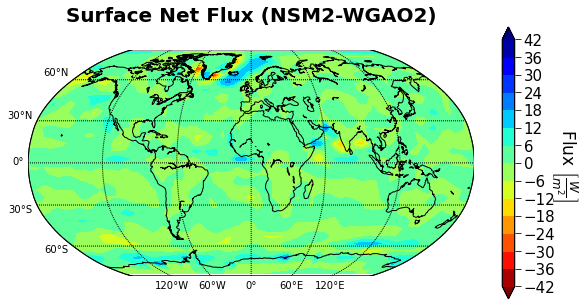

In [47]:
graph_globe_SUP=[Dataset(path_array[i]+name_files[i]+"_YM_"+str(step[i])+"YM_"+str(ends[i])+"Y_rss.nc")["rss"][0]+Dataset(path_array[i]+name_files[i]+"_YM_"+str(step[i])+"YM_"+str(ends[i])+"Y_rls.nc")["rls"][0]+\
                 Dataset(path_array[i]+name_files[i]+"_YM_"+str(step[i])+"YM_"+str(ends[i])+"Y_hfss.nc")["hfss"][0]+Dataset(path_array[i]+name_files[i]+"_YM_"+str(step[i])+"YM_"+str(ends[i])+"Y_hfls.nc")["hfls"][0]-\
                 0*334000*Dataset(path_array[i]+name_files[i]+"_YM_"+str(step[i])+"YM_"+str(ends[i])+"Y_prsn.nc")["prsn"][0] for i in range(0,len(name_files))]

all_graph_globe2(graph_globe_SUP,"Surface Net Flux",r" Flux $\left[\frac{W}{m ^2}\right]$",lons,lats,"robin")

## Meridional Transport SUP ##

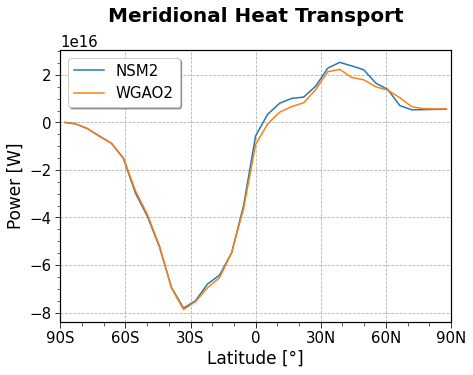

In [48]:
SUP_mer_transport=np.zeros((len(data_SUP_zonal),len(delta_lat)))
for j in range(0,len(data_SUP_zonal)):
    data_SUP_mean=np.mean(data_SUP_global[j][starts[j]:ends[j]])
   
    #SUP_mer_transport[j]=np.insert(SUP_mer_transport[j],0,0)
    for i in range(1,len(SUP_mer_transport[j])):
        SUP_mer_transport[j][i]=SUP_mer_transport[j][i-1]+2*r_eq**2*np.pi*np.cos(np.pi*lat_m[i-1]/180)*delta_lat[i-1]*(data_SUP_zonal[j][i-1]-data_SUP_mean)
    
graph([lat_m for i in range(0,len(name_files))],SUP_mer_transport,"Meridional Heat Transport",legend_array,"upper center","Latitude [°]","Power [W]",True,True)

# PLOT VARIABLES#

In [49]:

def autolabel(rects,ax,rounds):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(round(height,rounds)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                     xytext=(0, 10*np.sign(height)),  # 3 points vertical offset
                   textcoords="offset points",
                    ha='center',va="center",fontsize=15)

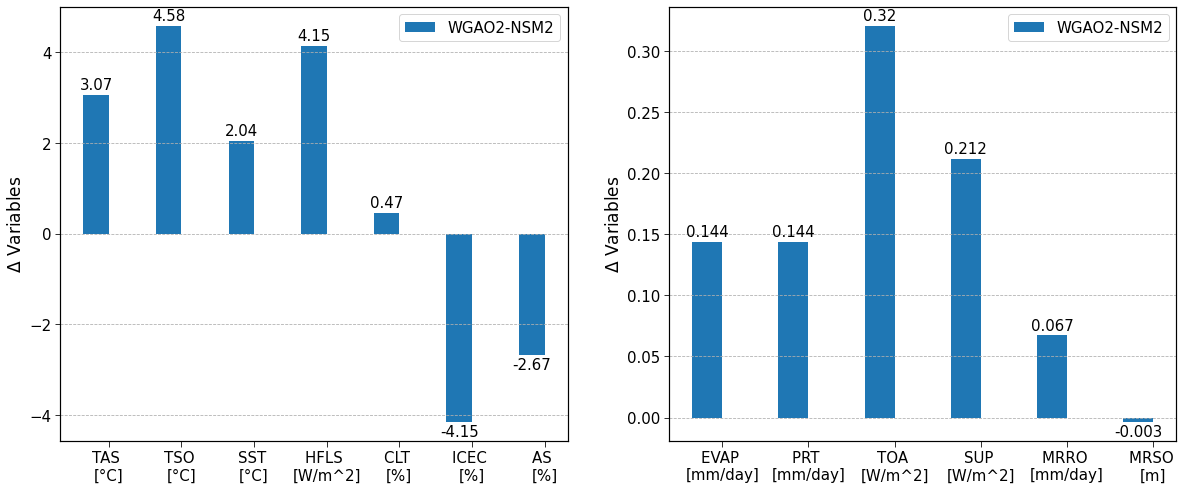

In [50]:
labelx1=["TAS \n[°C]","TSO \n[°C]","SST \n[°C]","HFLS \n[W/m^2]","CLT \n[%]","ICEC \n[%]","AS \n[%]"]
labelx2=["EVAP \n[mm/day]","PRT \n[mm/day]","TOA \n[W/m^2]","SUP \n[W/m^2]", "MRRO \n[mm/day]","MRSO \n[m]"]

y1=[np.mean(data_tas_global[1][starts[1]:ends[1]])-np.mean(data_tas_global[0][starts[0]:ends[0]]),\
    np.mean(data_tso_global[1][starts[1]:ends[1]])-np.mean(data_tso_global[0][starts[0]:ends[0]]),\
   np.mean(data_sst_global[1][starts[1]:ends[1]])-np.mean(data_sst_global[0][starts[0]:ends[0]]),\
    np.abs(np.mean(data_hfls_global[1][starts[1]:ends[1]]))\
    -np.abs(np.mean(data_hfls_global[0][starts[0]:ends[0]])),\
     np.mean(data_clt_global[1][starts[1]:ends[1]])-np.mean(data_clt_global[0][starts[0]:ends[0]]),\
 np.mean(data_icec_global[1][starts[1]:ends[1]])-np.mean(data_icec_global[0][starts[0]:ends[0]]),\
  np.mean(data_as_global[1][starts[1]:ends[1]])-np.mean(data_as_global[0][starts[0]:ends[0]])]

y3=[
   np.abs(np.mean(data_evap_global[1][starts[1]:ends[1]]))\
    -np.abs(np.mean(data_evap_global[0][starts[0]:ends[0]])),
  np.mean(data_prt_global[1][starts[1]:ends[1]])-np.mean(data_prt_global[0][starts[0]:ends[0]]),\
   np.abs(np.mean(data_TOA_global[1][starts[1]:ends[1]]))\
    -np.abs(np.mean(data_TOA_global[0][starts[0]:ends[0]])),\
  np.abs(np.mean(data_SUP_global[1][starts[1]:ends[1]]))\
    -np.abs(np.mean(data_SUP_global[0][starts[0]:ends[0]])),\
  np.mean(data_mrro_global[1][starts[1]:ends[1]])-np.mean(data_mrro_global[0][starts[0]:ends[0]]),\
  np.mean(data_mrso_global[1][starts[1]:ends[1]])-np.mean(data_mrso_global[0][starts[0]:ends[0]])
  ]



width = 0.35  
fig,ax=plt.subplots(1,2,figsize=(20,8))
x1 = np.arange(len(labelx1))
rects1 = ax[0].bar(x1 - width/2, y1, width, label='WGAO2-NSM2')
autolabel(rects1,ax[0],2)
ax[0].set_xticks(x1)
ax[0].set_xticklabels(labelx1)
ax[0].legend()
ax[0].grid(axis="y",linestyle="--")
ax[0].set_ylabel(r"$\Delta$ Variables")


x2 = np.arange(len(labelx2))
rects3 = ax[1].bar(x2 - width/2, y3, width, label='WGAO2-NSM2')
autolabel(rects3,ax[1],3)

ax[1].set_xticks(x2)
ax[1].set_xticklabels(labelx2)
ax[1].legend()
ax[1].grid(axis="y",linestyle="--")
ax[1].set_ylabel(r"$\Delta$ Variables")


#fig.suptitle("VARIABLE DIFFERENCES",fontsize=15,fontweight="bold")
#plt.xticks(ticks=True)
plt.show()
fig.savefig("grafici/Variable Differences",bbox_inches='tight')

# ANTARCTICA #

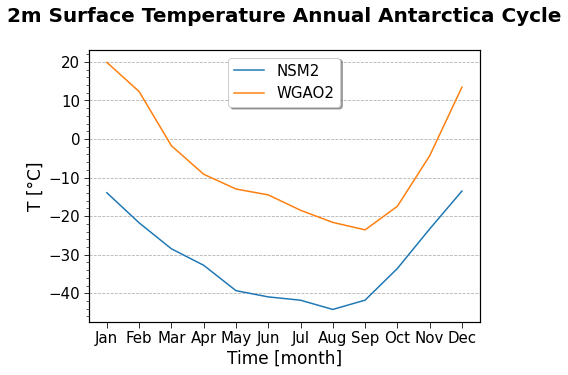

In [51]:
_=graph_Antarctica(path_array,legend_array,name_files,"tas",ends,mesi,"2m Surface Temperature","T [°C]",data172,True,1)

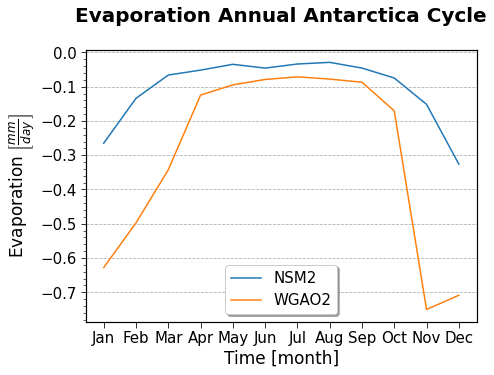

In [52]:
_=graph_Antarctica(path_array,legend_array,name_files,"evap",ends,mesi,"Evaporation",r"Evaporation $\left[\frac{mm}{day}\right]$",data172,False,86400000)

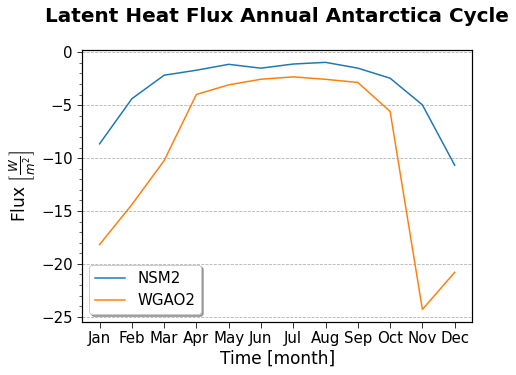

In [53]:
_=graph_Antarctica(path_array,legend_array,name_files,"hfls",ends,mesi,"Latent Heat Flux",r"Flux $\left[\frac{W}{m^2}\right]$",data172,False,1)

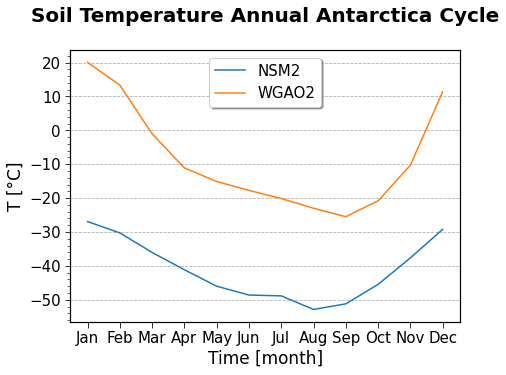

In [54]:
_=graph_Antarctica(path_array,legend_array,name_files,"tso",ends,mesi,"Soil Temperature","T [°C]",data172,True,1)

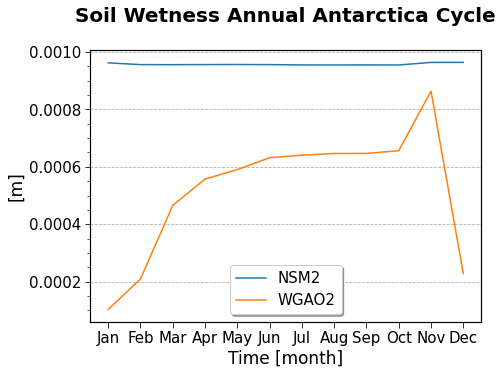

In [55]:
_=graph_Antarctica(path_array,legend_array,name_files,"mrso",ends,mesi,"Soil Wetness","[m]",data172,False,1)

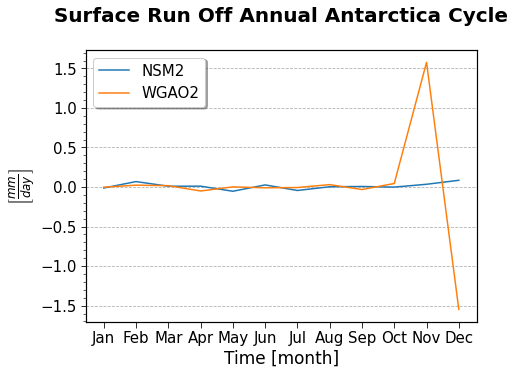

In [56]:
_=graph_Antarctica(path_array,legend_array,name_files,"mrro",ends,mesi,"Surface Run Off",r"$\left[\frac{mm}{day}\right]$",data172,False,86400000)

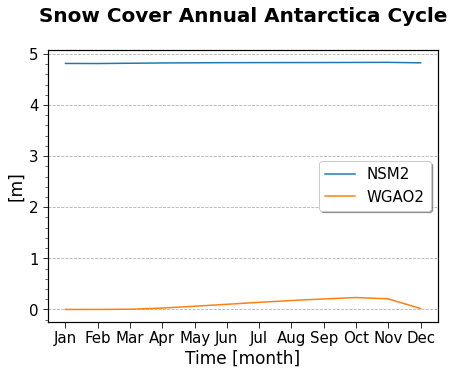

In [57]:
_=graph_Antarctica(path_array,legend_array,name_files,"snd",ends,mesi,"Snow Cover","[m]",data172,False,1)

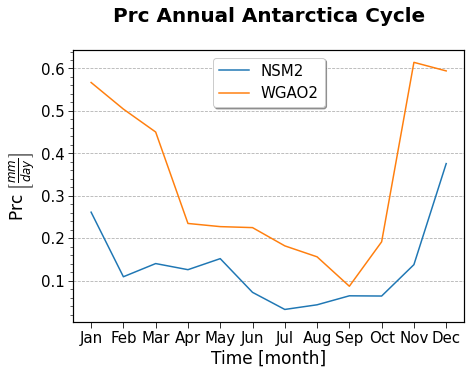

In [58]:
prc_antarctica=graph_Antarctica(path_array,legend_array,name_files,"prc",ends,mesi,"Prc",r"Prc $\left[\frac{mm}{day}\right]$",data172,False,86400000)

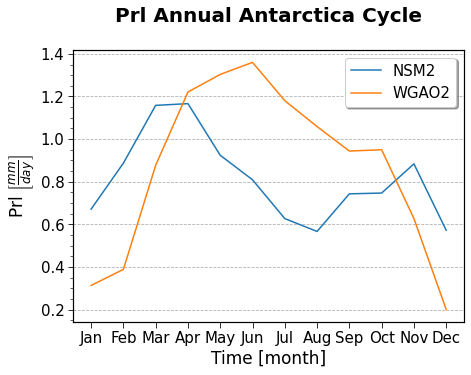

In [59]:
prl_antarctica=graph_Antarctica(path_array,legend_array,name_files,"prl",ends,mesi,"Prl",r"Prl $\left[\frac{mm}{day}\right]$",data172,False,86400000)

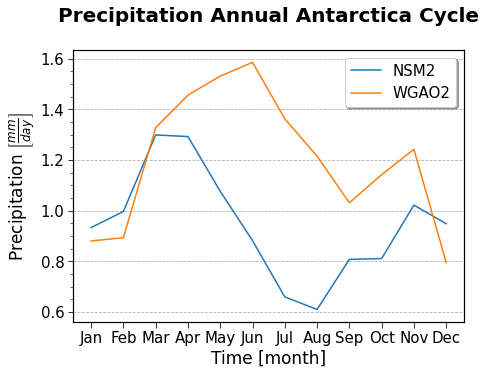

In [60]:
np.add(prc_antarctica,prl_antarctica)
graph(mesi,np.add(prc_antarctica,prl_antarctica),"Precipitation Annual Antarctica Cycle",legend_array,"upper center","Time [month]",r"Precipitation $\left[\frac{mm}{day}\right]$",True,False)

# NORTH HEMISPHERE #

153
153


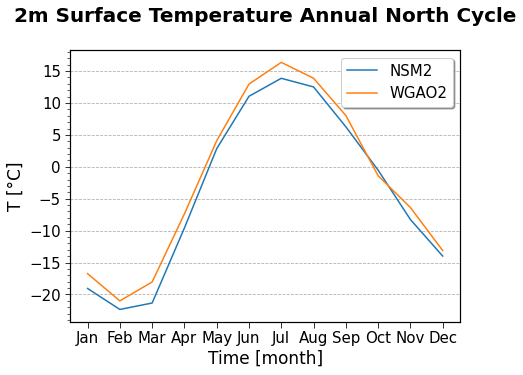

In [61]:
_=graph_60N(path_array,legend_array,name_files,"tas",ends,mesi,"2m Surface Temperature","T [°C]",data172,True,1)

153
153


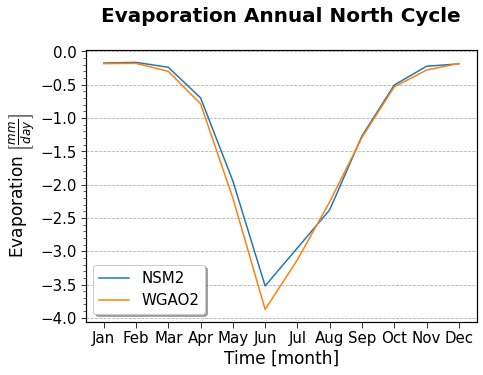

In [62]:
_=graph_60N(path_array,legend_array,name_files,"evap",ends,mesi,"Evaporation",r"Evaporation $\left[\frac{mm}{day}\right]$",data172,False,86400000)